<a href="https://colab.research.google.com/github/Whoami666/Free-Practice/blob/main/Neuroscience/Online_lectures_attention_electro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
electro_nl = 'https://docs.google.com/spreadsheets/d/1843cEYKKW1m-NcXGFZ6SsjKB0WrNFiIYCf7z8HDE6mg/edit#gid=634790003'
electro_nl_url = electro_nl.replace('/edit#gid=', '/export?format=csv&gid=')

electro_l = 'https://docs.google.com/spreadsheets/d/1DM7HWozarErHE_7NeLFmMniBBr0E57mGjT3kssgHzKc/edit#gid=1722263721'
electro_l_url = electro_l.replace('/edit#gid=', '/export?format=csv&gid=')

In [ ]:
df_enu = pd.read_csv(electro_nl_url)
df_enu["lector_flag"] = 'nl'

df_el = pd.read_csv(electro_l_url)
df_el["lector_flag"] = 'l'
df_enu.head(1)

,Отметка времени,Баллы,Ваш ID,На сколько блоков можно разделить систему электроснабжения?,Что такое линия передач?,Выберите все верные утверждения (речь именно о Якутии),Какие опоры наиболее популярны? (в Якутии),Где находился логотип во время всей лекции?,Оцените лектора,Оцените качество презентации (слайды),Оцените лекцию в целом,Что бы вам хотелось изменить в лекции?,lector_flag
0,30.03.2023 14:12:12,3 / 6,2.1,3,Один из способов передачи электроэнергии,Не помню,Деревянные,Логотипа не было,2,1,3,"дизайн (ВЕСЬ), лектора домой, слайд с тетькой ...",nl


In [ ]:
df = pd.concat([df_enu, df_el], ignore_index=True)
df.head()

,Отметка времени,Баллы,Ваш ID,На сколько блоков можно разделить систему электроснабжения?,Что такое линия передач?,Выберите все верные утверждения (речь именно о Якутии),Какие опоры наиболее популярны? (в Якутии),Где находился логотип во время всей лекции?,Оцените лектора,Оцените качество презентации (слайды),Оцените лекцию в целом,Что бы вам хотелось изменить в лекции?,lector_flag
0,30.03.2023 14:12:12,3 / 6,2.1,3,Один из способов передачи электроэнергии,Не помню,Деревянные,Логотипа не было,2,1,3,"дизайн (ВЕСЬ), лектора домой, слайд с тетькой ...",nl
1,30.03.2023 17:35:13,5 / 6,2.2,3,Один из способов передачи электроэнергии,На проводах зимой бывает снег,Деревянные,Справа,3,3,4,-,nl
2,31.03.2023 13:36:20,3 / 6,2.3,3,Один из способов передачи электроэнергии,"На проводах зимой бывает лед, Не помню",Деревянные,Слева,3,2,2,Поживее дикцию,nl
3,31.03.2023 15:02:03,2 / 6,2.4,4,Один из способов передачи электроэнергии,Не помню,Деревянные,Логотипа не было,4,1,3,"Более интерактивные изображения, улучшить каче...",nl
4,31.03.2023 16:23:49,2 / 6,2.5,3,Один из способов передачи электроэнергии,Не помню,Железо-бетонные,Логотипа не было,3,3,4,Картинки более высокого качества,nl


In [ ]:
df = df.rename(columns={"Отметка времени": "time",
                    "Ваш ID": "id", "Баллы": "points", 
                    "На сколько блоков можно разделить систему электроснабжения?": "Q1_blocks", 
                    "Что такое линия передач?": "Q2_line", 
                    "Выберите все верные утверждения (речь именно о Якутии)": "Q3_ice", 
                    "Какие опоры наиболее популярны? (в Якутии)": "Q4_supports", 
                    "Где находился логотип во время всей лекции?": "Q5_logo",
                    "Оцените лектора": "Lector_rate",
                    "Оцените качество презентации (слайды)": "Slide_rate",
                    "Оцените лекцию в целом": "General_rate",
                    "Что бы вам хотелось изменить в лекции?": "Comment"})
df.head(1)

,time,points,id,Q1_blocks,Q2_line,Q3_ice,Q4_supports,Q5_logo,Lector_rate,Slide_rate,General_rate,Comment,lector_flag
0,30.03.2023 14:12:12,3 / 6,2.1,3,Один из способов передачи электроэнергии,Не помню,Деревянные,Логотипа не было,2,1,3,"дизайн (ВЕСЬ), лектора домой, слайд с тетькой ...",nl


In [ ]:
df.points = df.points.apply(lambda x: int(x.replace('/ 6', '')))
df.head(1)

,time,points,id,Q1_blocks,Q2_line,Q3_ice,Q4_supports,Q5_logo,Lector_rate,Slide_rate,General_rate,Comment,lector_flag
0,30.03.2023 14:12:12,3,2.1,3,Один из способов передачи электроэнергии,Не помню,Деревянные,Логотипа не было,2,1,3,"дизайн (ВЕСЬ), лектора домой, слайд с тетькой ...",nl


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   time          14 non-null     object
 1   points        14 non-null     int64 
 2   id            14 non-null     object
 3   Q1_blocks     14 non-null     int64 
 4   Q2_line       14 non-null     object
 5   Q3_ice        14 non-null     object
 6   Q4_supports   14 non-null     object
 7   Q5_logo       14 non-null     object
 8   Lector_rate   14 non-null     int64 
 9   Slide_rate    14 non-null     int64 
 10  General_rate  14 non-null     int64 
 11  Comment       14 non-null     object
 12  lector_flag   14 non-null     object
dtypes: int64(5), object(8)
memory usage: 1.5+ KB


Text(0.5, 0, 'Лектор(l), без лектора(nl)')

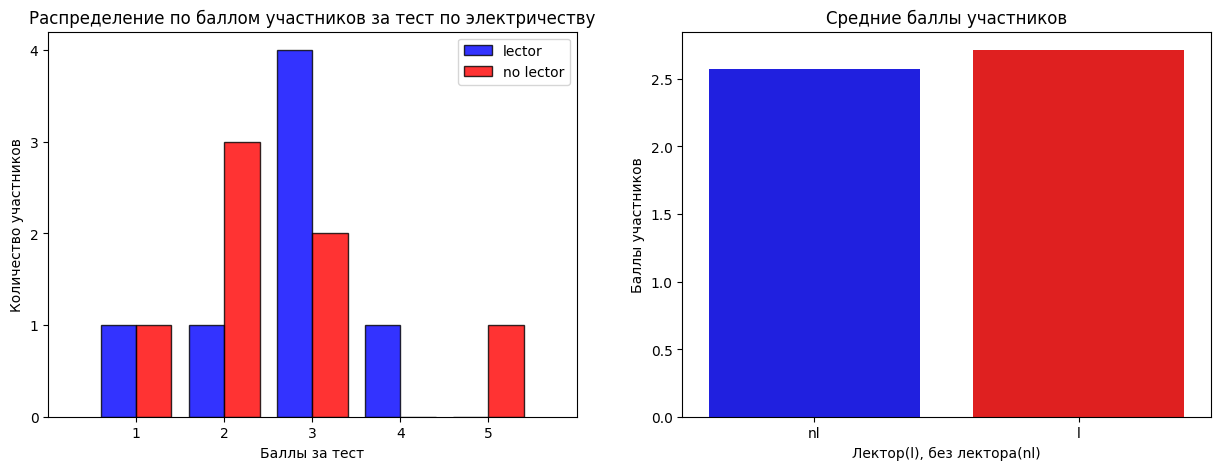

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist([df[df.lector_flag=='l'].points, df[df.lector_flag=='nl'].points], 
        edgecolor='black', color=['b', 'r'], 
        label=['lector', 'no lector'],alpha=0.8, bins=range(1, 7), align='left')
plt.xticks(range(1, 6))
plt.yticks(range(0, 5))
plt.xlim([0, 6])
plt.legend(loc='upper right')
plt.title('Распределение по баллом участников за тест по электричеству')
plt.ylabel('Количество участников')
plt.xlabel('Баллы за тест')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='lector_flag', y=df.points, errorbar=None, palette = ['b', 'r'])
plt.title("Средние баллы участников")
plt.ylabel("Баллы участников")
plt.xlabel("Лектор(l), без лектора(nl)")

Text(0.5, 0, 'Лектор(l), без лектора(nl)')

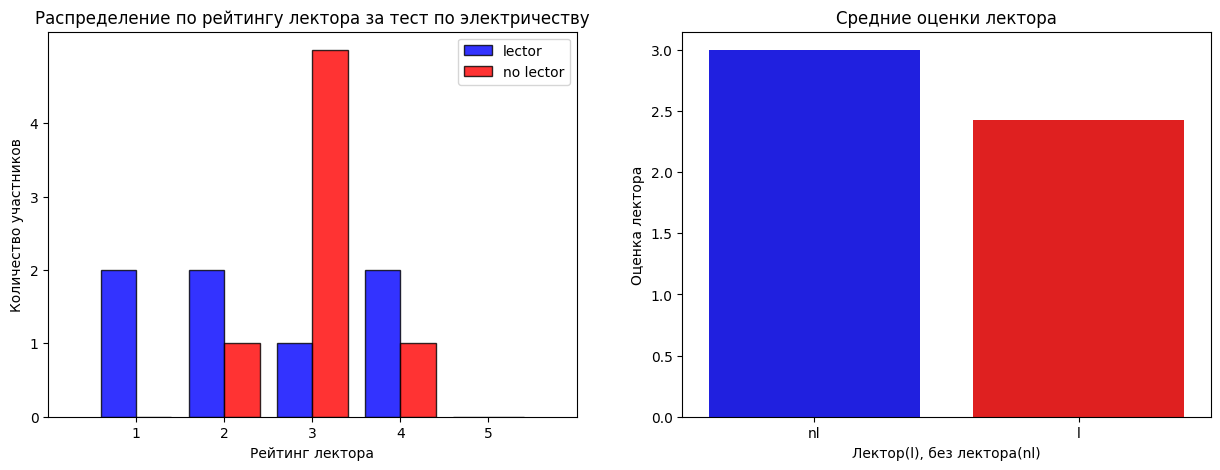

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist([df[df.lector_flag=='l'].Lector_rate, df[df.lector_flag=='nl'].Lector_rate], 
        edgecolor='black', color=['b', 'r'], 
        label=['lector', 'no lector'],alpha=0.8, bins=range(1, 7), align='left')
plt.xticks(range(1, 6))
plt.yticks(range(0, 5))
plt.xlim([0, 6])
plt.legend(loc='upper right')
plt.title('Распределение по рейтингу лектора за тест по электричеству')
plt.ylabel('Количество участников')
plt.xlabel('Рейтинг лектора')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='lector_flag', y=df.Lector_rate, errorbar=None, palette = ['b', 'r'])
plt.title("Средние оценки лектора")
plt.ylabel("Оценка лектора")
plt.xlabel("Лектор(l), без лектора(nl)")

Text(0.5, 0, 'Лектор(l), без лектора(nl)')

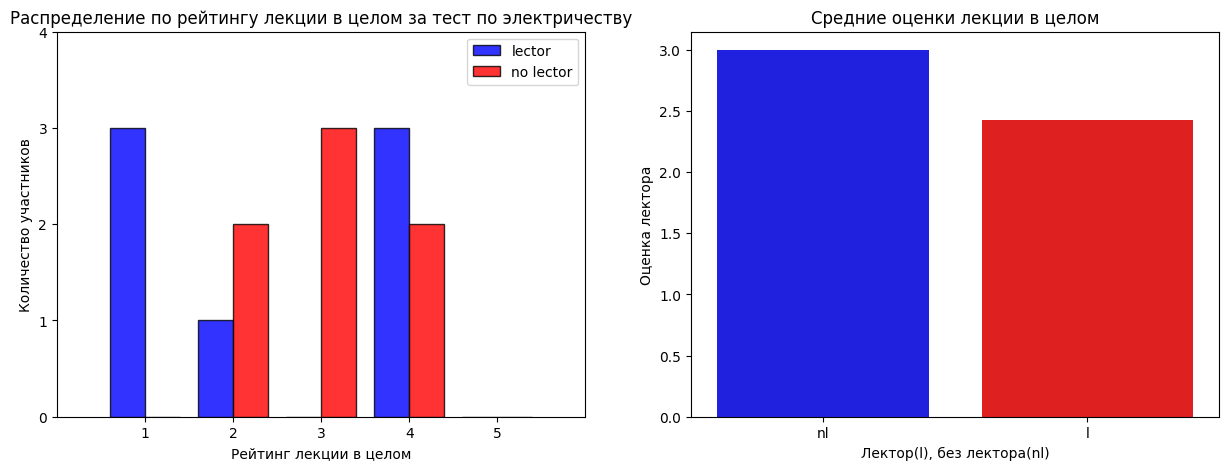

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist([df[df.lector_flag=='l'].General_rate, df[df.lector_flag=='nl'].General_rate], 
        edgecolor='black', color=['b', 'r'], 
        label=['lector', 'no lector'],alpha=0.8, bins=range(1, 7), align='left')
plt.xticks(range(1, 6))
plt.yticks(range(0, 5))
plt.xlim([0, 6])
plt.legend(loc='upper right')
plt.title('Распределение по рейтингу лекции в целом за тест по электричеству')
plt.ylabel('Количество участников')
plt.xlabel('Рейтинг лекции в целом')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='lector_flag', y=df.General_rate, errorbar=None, palette = ['b', 'r'])
plt.title("Средние оценки лекции в целом")
plt.ylabel("Оценка лектора")
plt.xlabel("Лектор(l), без лектора(nl)")

Text(0.5, 0, 'Лектор(l), без лектора(nl)')

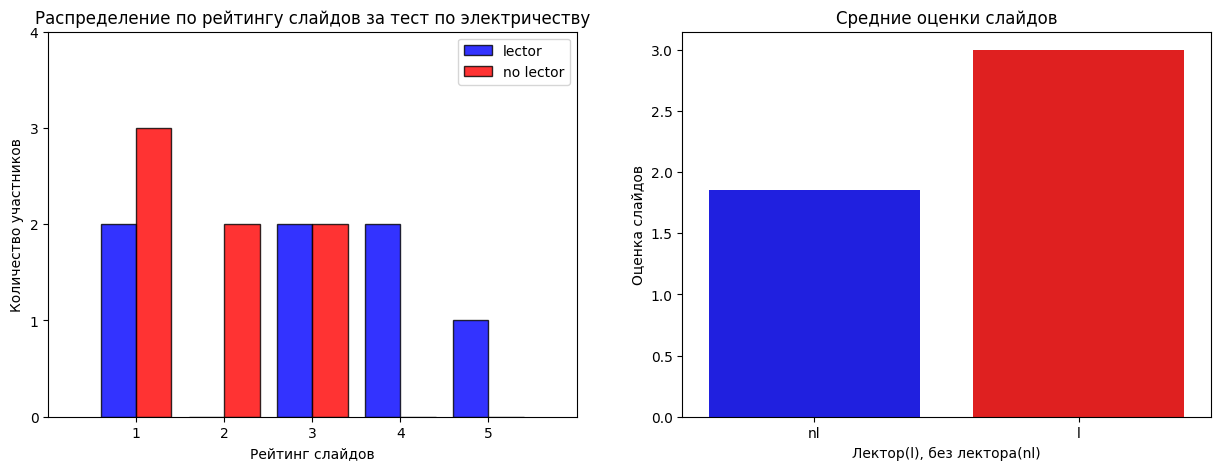

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist([df[df.lector_flag=='l'].Slide_rate, df[df.lector_flag=='nl'].Slide_rate], 
        edgecolor='black', color=['b', 'r'], 
        label=['lector', 'no lector'],alpha=0.8, bins=range(1, 7), align='left')
plt.xticks(range(1, 6))
plt.yticks(range(0, 5))
plt.xlim([0, 6])
plt.legend(loc='upper right')
plt.title('Распределение по рейтингу слайдов за тест по электричеству')
plt.ylabel('Количество участников')
plt.xlabel('Рейтинг слайдов')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='lector_flag', y=df.Slide_rate, errorbar=None, palette = ['b', 'r'])
plt.title("Средние оценки слайдов")
plt.ylabel("Оценка слайдов")
plt.xlabel("Лектор(l), без лектора(nl)")

In [ ]:
df.drop(columns='Q1_blocks').corr()

,points,Lector_rate,Slide_rate,General_rate
points,1.000000,-0.388139,-0.151333,-0.143380
Lector_rate,-0.388139,1.000000,0.386861,0.568831
Slide_rate,-0.151333,0.386861,1.000000,0.462168
General_rate,-0.143380,0.568831,0.462168,1.000000
